REPOSITORY

https://github.com/jayakrishnakatta/Deep-Learning

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Reproducibility
tf.random.set_seed(42)
np.random.seed(42)


In [2]:
# Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalise pixel values
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Create validation set
x_val = x_train[-6000:]
y_val = y_train[-6000:]

x_train = x_train[:-6000]
y_train = y_train[:-6000]

print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (54000, 28, 28)
Val: (6000, 28, 28)
Test: (10000, 28, 28)


In [3]:
# Return correct activation layer
def activation_layer(name):
    if name == "leaky_relu":
        return layers.LeakyReLU(alpha=0.1)
    else:
        return layers.Activation(name)

def build_model(activation):
    return keras.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(256),
        activation_layer(activation),
        layers.Dense(128),
        activation_layer(activation),
        layers.Dense(10, activation="softmax")
    ])


In [4]:
activations = ["sigmoid", "tanh", "relu", "leaky_relu"]

histories = {}

for act in activations:
    print(f"\nTraining model with activation: {act}")
    model = build_model(act)
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size=128,
        verbose=2
    )

    histories[act] = history



Training model with activation: sigmoid


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 - 4s - 9ms/step - accuracy: 0.7566 - loss: 0.7360 - val_accuracy: 0.8302 - val_loss: 0.4607
Epoch 2/10
422/422 - 3s - 8ms/step - accuracy: 0.8461 - loss: 0.4308 - val_accuracy: 0.8530 - val_loss: 0.3973
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.8611 - loss: 0.3849 - val_accuracy: 0.8630 - val_loss: 0.3705
Epoch 4/10
422/422 - 2s - 6ms/step - accuracy: 0.8703 - loss: 0.3587 - val_accuracy: 0.8678 - val_loss: 0.3546
Epoch 5/10
422/422 - 2s - 6ms/step - accuracy: 0.8767 - loss: 0.3395 - val_accuracy: 0.8723 - val_loss: 0.3436
Epoch 6/10
422/422 - 2s - 6ms/step - accuracy: 0.8828 - loss: 0.3237 - val_accuracy: 0.8777 - val_loss: 0.3352
Epoch 7/10
422/422 - 4s - 8ms/step - accuracy: 0.8871 - loss: 0.3102 - val_accuracy: 0.8805 - val_loss: 0.3285
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.8914 - loss: 0.2982 - val_accuracy: 0.8807 - val_loss: 0.3232
Epoch 9/10
422/422 - 5s - 11ms/step - accuracy: 0.8956 - loss: 0.2873 - val_accuracy: 0.8818 - val_loss: 0.3191


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
422/422 - 4s - 11ms/step - accuracy: 0.8126 - loss: 0.5281 - val_accuracy: 0.8552 - val_loss: 0.4007
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.8636 - loss: 0.3762 - val_accuracy: 0.8712 - val_loss: 0.3629
Epoch 3/10
422/422 - 3s - 6ms/step - accuracy: 0.8769 - loss: 0.3338 - val_accuracy: 0.8695 - val_loss: 0.3531
Epoch 4/10
422/422 - 2s - 6ms/step - accuracy: 0.8863 - loss: 0.3077 - val_accuracy: 0.8713 - val_loss: 0.3519
Epoch 5/10
422/422 - 3s - 6ms/step - accuracy: 0.8938 - loss: 0.2892 - val_accuracy: 0.8740 - val_loss: 0.3502
Epoch 6/10
422/422 - 3s - 8ms/step - accuracy: 0.8993 - loss: 0.2741 - val_accuracy: 0.8730 - val_loss: 0.3512
Epoch 7/10
422/422 - 2s - 6ms/step - accuracy: 0.9051 - loss: 0.2591 - val_accuracy: 0.8725 - val_loss: 0.3638
Epoch 8/10
422/422 - 2s - 6ms/step - accuracy: 0.9090 - loss: 0.2467 - val_accuracy: 0.8748 - val_loss: 0.3633
Epoch 9/10
422/422 - 2s - 6ms/step - accuracy: 0.9132 - loss: 0.2344 - val_accuracy: 0.8730 - val_loss: 0.3711


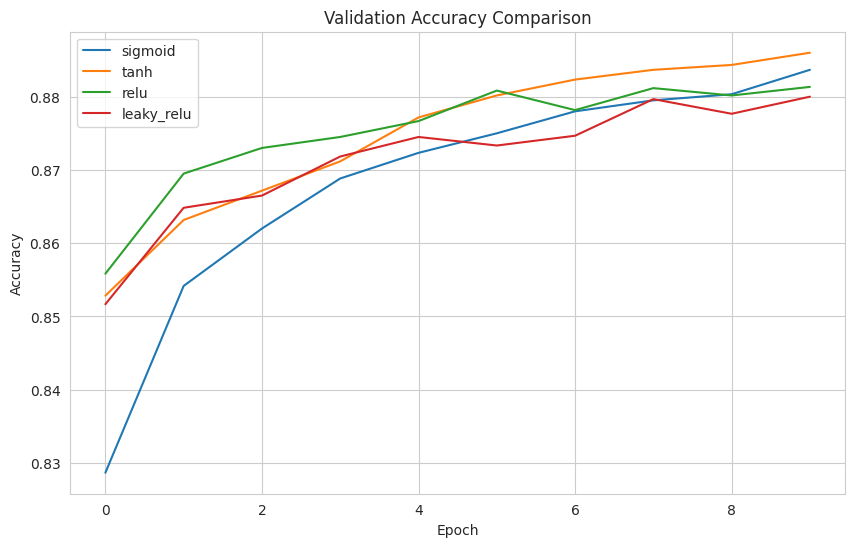

In [ ]:
plt.figure(figsize=(10,6))
for act in activations:
    plt.plot(histories[act].history["val_accuracy"], label=act)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


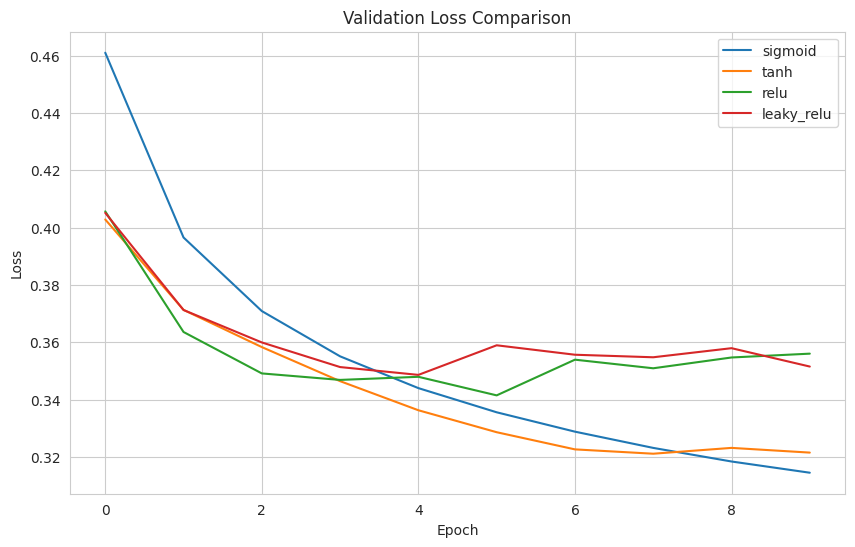

In [ ]:
plt.figure(figsize=(10,6))
for act in activations:
    plt.plot(histories[act].history["val_loss"], label=act)

plt.title("Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
activation_outputs = {}

for act in activations:
    model = build_model(act)
    # Explicitly build the model before accessing model.input
    model.build(input_shape=(None, 28, 28)) # (batch_size, height, width)
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy"
    )

    # Train briefly to get meaningful activations
    model.fit(x_train, y_train, epochs=2, batch_size=128, verbose=0)

    # Create submodel to extract first Dense layer output
    activation_model = keras.Model(
        inputs=model.layers[0].input,   # Use the input of the first layer (Flatten)
        outputs=model.layers[1].output   # first Dense layer
    )

    sample = x_train[:1000]
    acts = activation_model.predict(sample).flatten()
    activation_outputs[act] = acts

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


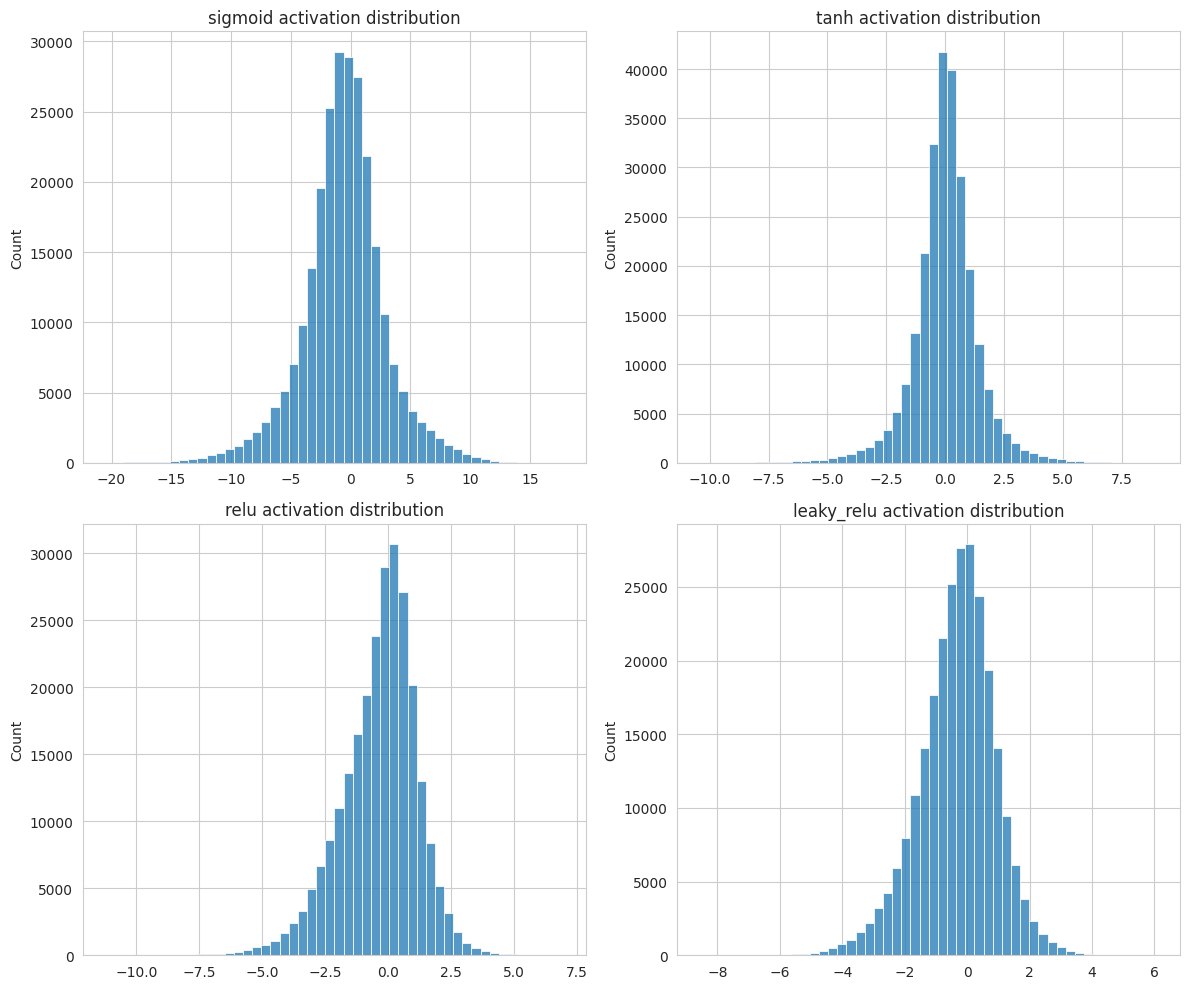

In [ ]:
plt.figure(figsize=(12,10))

for i, act in enumerate(activations, 1):
    plt.subplot(2,2,i)
    sns.histplot(activation_outputs[act], bins=50, kde=False)
    plt.title(f"{act} activation distribution")

plt.tight_layout()
plt.show()


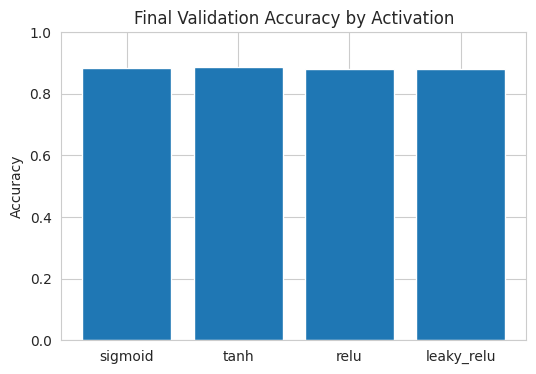

{'sigmoid': 0.8836666941642761,
 'tanh': 0.8859999775886536,
 'relu': 0.8813333511352539,
 'leaky_relu': 0.8799999952316284}

In [ ]:
final_acc = {act: histories[act].history["val_accuracy"][-1] for act in activations}

plt.figure(figsize=(6,4))
plt.bar(final_acc.keys(), final_acc.values())
plt.title("Final Validation Accuracy by Activation")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

final_acc  # shows exact values
